In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import pandas as pd


In [2]:
mp_drawing= mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [3]:
def detection(image, model):
    image =  cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable= False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    return image,results

In [4]:
def draw_landmark(image, results):

    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=3),
                                mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=2)
                                )
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=3),
                                mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=2)
                                )
    """
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                                mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                )
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=3),
                                mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=2)
                                )
    """
    

In [5]:
"""
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
left_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
right_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(10404)
"""

'\npose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)\nleft_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)\nright_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)\nface = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(10404)\n'

In [6]:
def get_landmarks(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    #face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    #left_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    right_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
   
    return np.concatenate([pose, right_hand])

In [7]:
"""
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence= 0.5) as holistic:

    while cap.isOpened():
        ret,frame = cap.read()

        image, results = detection(frame, holistic)

        draw_landmark(image,results)

        cv2.imshow('Live Feed', image)
        if cv2.waitKey(10) & 0xff == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows() 
"""

"\ncap = cv2.VideoCapture(0)\nwith mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence= 0.5) as holistic:\n\n    while cap.isOpened():\n        ret,frame = cap.read()\n\n        image, results = detection(frame, holistic)\n\n        draw_landmark(image,results)\n\n        cv2.imshow('Live Feed', image)\n        if cv2.waitKey(10) & 0xff == ord('q'):\n            break\n    cap.release()\n    cv2.destroyAllWindows() \n"

In [8]:

data_path= os.path.join('data_mod1')

actions= np.array(['left','right','up','down'])
no_sequences = 120 # 60 frames as video
sequence_length= 30 # 30fps


In [9]:
"""
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(data_path, action, str(sequence)))
        except:
            pass 
"""

'\nfor action in actions:\n    for sequence in range(no_sequences):\n        try:\n            os.makedirs(os.path.join(data_path, action, str(sequence)))\n        except:\n            pass \n'

In [10]:
"""
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence= 0.5) as holistic:

    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                ret,frame = cap.read()

                image, results = detection(frame, holistic)

                draw_landmark(image,results)
                
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                keypoints = get_landmarks(results)
                numpy_path = os.path.join(data_path, action, str(sequence), str(frame_num))
                np.save(numpy_path, keypoints)

                cv2.imshow('Live Feed', image)

                if cv2.waitKey(10) & 0xff == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows() 
"""

"\ncap = cv2.VideoCapture(0)\nwith mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence= 0.5) as holistic:\n\n    for action in actions:\n        for sequence in range(no_sequences):\n            for frame_num in range(sequence_length):\n                ret,frame = cap.read()\n\n                image, results = detection(frame, holistic)\n\n                draw_landmark(image,results)\n                \n                if frame_num == 0: \n                    cv2.putText(image, 'STARTING COLLECTION', (120,200), \n                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)\n                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), \n                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)\n                    # Show to screen\n                    cv2.imshow('OpenCV Feed', image)\n                    cv2.waitKey(2000)\n                else: \n    

In [11]:
#results.right_hand_landmarks.landmark

In [12]:
"""
cap.release()
cv2.destroyAllWindows() 
"""

'\ncap.release()\ncv2.destroyAllWindows() \n'

In [13]:

#get_landmarks(results).shape

In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [15]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'left': 0, 'right': 1, 'up': 2, 'down': 3}

In [16]:
"""
all=[]
total=[]
res = np.load(os.path.join(data_path, actions, "0.npy"))
all.append(res)
all
total.append(all)
total
"""

'\nall=[]\ntotal=[]\nres = np.load(os.path.join(data_path, actions, "0.npy"))\nall.append(res)\nall\ntotal.append(all)\ntotal\n'

In [17]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(data_path, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(data_path, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [18]:
np.array(sequences).shape

(480, 30, 195)

In [19]:
X=np.array(sequences)
y = to_categorical(labels).astype(int)

In [20]:
X

array([[[ 0.57326591,  0.37208176, -1.07030773, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.58735645,  0.3720898 , -0.52504528, ...,  0.23750025,
          0.28290713, -0.03710108],
        [ 0.59083867,  0.37182474, -0.45726928, ...,  0.23829547,
          0.28222895, -0.0344593 ],
        ...,
        [ 0.59979194,  0.3619425 , -0.35381609, ...,  0.95109588,
          0.64181393, -0.04579314],
        [ 0.59929043,  0.36163625, -0.35002249, ...,  0.95030701,
          0.64198595, -0.04366122],
        [ 0.59842312,  0.36154068, -0.26564714, ...,  0.94640023,
          0.64436448, -0.03939681]],

       [[ 0.59759879,  0.36153069, -0.29982325, ...,  0.93838573,
          0.65028661, -0.04019528],
        [ 0.55637312,  0.35621807, -0.51523149, ...,  0.14935058,
          0.57929301, -0.05398376],
        [ 0.5527783 ,  0.35167471, -0.56648815, ...,  0.15420732,
          0.57607698, -0.04670449],
        ...,
        [ 0.60621417,  0.35159251, -0.38740081, ...,  

In [21]:
y.shape

(480, 4)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [23]:
X_train.shape


(456, 30, 195)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import load_model
import tensorflow as tf
from sklearn.metrics import classification_report,confusion_matrix
#model = load_model('action_mod.h5')

In [25]:

"""model = Sequential()
model.add(layers.GRU(16, return_sequences=True, activation='relu', input_shape=(30,195)))
model.add(layers.Dropout(0.2))
model.add(layers.GRU(32, return_sequences=True, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.GRU(16, return_sequences=False, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8))
model.add(layers.Dense(actions.shape[0], activation='softmax'))
#Working 99 fastest action_mod"""


"model = Sequential()\nmodel.add(layers.GRU(16, return_sequences=True, activation='relu', input_shape=(30,195)))\nmodel.add(layers.Dropout(0.2))\nmodel.add(layers.GRU(32, return_sequences=True, activation='relu'))\nmodel.add(layers.Dropout(0.2))\nmodel.add(layers.GRU(16, return_sequences=False, activation='relu'))\nmodel.add(layers.Dropout(0.2))\nmodel.add(layers.Dense(8))\nmodel.add(layers.Dense(actions.shape[0], activation='softmax'))\n#Working 99 fastest action_mod"

In [26]:

model = Sequential()
model.add(layers.LSTM(64, return_sequences=True, activation='relu', input_shape=(30,195)))
model.add(layers.LSTM(128, return_sequences=True, activation='relu'))
model.add(layers.LSTM(64, return_sequences=False, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(actions.shape[0], activation='softmax'))
#Working 99 fastest action_mod


In [27]:
"""
model = Sequential([
    layers.LSTM(512, return_sequences=True, activation='relu', input_shape=(30,195)),
    layers.Bidirectional(layers.GRU(256, return_sequences=True, activation='relu')),
    layers.Bidirectional(layers.GRU(128, return_sequences=True, activation='relu')),
    layers.Bidirectional(layers.GRU(128, return_sequences=True, activation='relu')),
    layers.Bidirectional(layers.GRU(64, return_sequences=False, activation='relu')),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(actions.shape[0], activation='softmax'),
])#Working 99 2nd fastest action_test
"""

"\nmodel = Sequential([\n    layers.LSTM(512, return_sequences=True, activation='relu', input_shape=(30,195)),\n    layers.Bidirectional(layers.GRU(256, return_sequences=True, activation='relu')),\n    layers.Bidirectional(layers.GRU(128, return_sequences=True, activation='relu')),\n    layers.Bidirectional(layers.GRU(128, return_sequences=True, activation='relu')),\n    layers.Bidirectional(layers.GRU(64, return_sequences=False, activation='relu')),\n    layers.Dense(64, activation='relu'),\n    layers.Dense(32, activation='relu'),\n    layers.Dense(actions.shape[0], activation='softmax'),\n])#Working 99 2nd fastest action_test\n"

In [28]:
"""
model = Sequential([
    layers.LSTM(8, return_sequences=True, activation='relu', input_shape=(30,195)),
    layers.Bidirectional(layers.LSTM(16, return_sequences=True, activation='relu')),
    layers.Bidirectional(layers.LSTM(32, return_sequences=True, activation='relu')),
    layers.Bidirectional(layers.LSTM(64, return_sequences=True, activation='relu')),
    layers.Bidirectional(layers.LSTM(32, return_sequences=False, activation='relu')),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(actions.shape[0], activation='softmax'),
])# working 99 slowest action_test1
"""

"\nmodel = Sequential([\n    layers.LSTM(8, return_sequences=True, activation='relu', input_shape=(30,195)),\n    layers.Bidirectional(layers.LSTM(16, return_sequences=True, activation='relu')),\n    layers.Bidirectional(layers.LSTM(32, return_sequences=True, activation='relu')),\n    layers.Bidirectional(layers.LSTM(64, return_sequences=True, activation='relu')),\n    layers.Bidirectional(layers.LSTM(32, return_sequences=False, activation='relu')),\n    layers.Dense(16, activation='relu'),\n    layers.Dense(8, activation='relu'),\n    layers.Dense(actions.shape[0], activation='softmax'),\n])# working 99 slowest action_test1\n"

In [29]:
"""
model = Sequential([
    layers.LSTM(8, return_sequences=True, activation='relu', input_shape=(30,195)),
    layers.LSTM(16, return_sequences=True, activation='relu'),
    #layers.TimeDistributed(layers.Dropout(0.2)),
    layers.LSTM(32, return_sequences=True, activation='relu'),
    layers.LSTM(64, return_sequences=True, activation='relu'),
    #layers.TimeDistributed(layers.Dropout(0.2)),
    layers.LSTM(32, return_sequences=False, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(actions.shape[0], activation='softmax'),
]) #action_test2 not working
"""

"\nmodel = Sequential([\n    layers.LSTM(8, return_sequences=True, activation='relu', input_shape=(30,195)),\n    layers.LSTM(16, return_sequences=True, activation='relu'),\n    #layers.TimeDistributed(layers.Dropout(0.2)),\n    layers.LSTM(32, return_sequences=True, activation='relu'),\n    layers.LSTM(64, return_sequences=True, activation='relu'),\n    #layers.TimeDistributed(layers.Dropout(0.2)),\n    layers.LSTM(32, return_sequences=False, activation='relu'),\n    layers.Dense(16, activation='relu'),\n    layers.Dense(8, activation='relu'),\n    layers.Dense(actions.shape[0], activation='softmax'),\n]) #action_test2 not working\n"

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 221,156
Trainable params: 221,156
Non-trai

In [31]:
tf.__version__

'2.9.0'

In [32]:
#adam= Adam(lr= 0.001, use_ema=True , ema_momentum=0.99,ema_overwrite_frequency=None)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [34]:
#learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
#learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1, factor=0.5, min_lr=0.0001)

In [35]:
#early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)

LSTM_model = model.fit(X_train, y_train, epochs=10,batch_size=32,
                       callbacks=[learning_rate_reduction],validation_data=(X_test,y_test))

Epoch 1/10
15/15 [==============================] - 7s 209ms/step - loss: 1.3122 - accuracy: 0.4035 - val_loss: 0.9661 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 2/10
15/15 [==============================] - 3s 185ms/step - loss: 0.8734 - accuracy: 0.6206 - val_loss: 0.8275 - val_accuracy: 0.7917 - lr: 0.0010
Epoch 3/10
15/15 [==============================] - 3s 196ms/step - loss: 0.8304 - accuracy: 0.7632 - val_loss: 0.5754 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 4/10
15/15 [==============================] - ETA: 0s - loss: 0.4142 - accuracy: 0.8728
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
15/15 [==============================] - 2s 159ms/step - loss: 0.4142 - accuracy: 0.8728 - val_loss: 0.5827 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 5/10
15/15 [==============================] - 3s 188ms/step - loss: 0.2841 - accuracy: 0.9123 - val_loss: 0.3541 - val_accuracy: 0.9167 - lr: 5.0000e-04
Epoch 6/10
15/15 [==============================] - ETA: 0s - 

In [36]:
history = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 48ms/step - loss: 0.5056 - accuracy: 0.9167


In [37]:
import datetime as dt

In [38]:
# Get the loss and accuracy from model_evaluation_history.
model_evaluation_loss, model_evaluation_accuracy = history

# Define the string date format.
# Get the current Date and Time in a DateTime Object.
# Convert the DateTime object to string according to the style mentioned in date_time_format string.
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)

# Define a useful name for our model to make it easy for us while navigating through multiple saved models.
model_file_name = f'convlstm_model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

# Save your Model.
#convlstm_model.save(model_file_name)

In [39]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    '''
    This function will plot the metrics passed to it in a graph.
    Args:
        model_training_history: A history object containing a record of training and validation 
                                loss values and metrics values at successive epochs
        metric_name_1:          The name of the first metric that needs to be plotted in the graph.
        metric_name_2:          The name of the second metric that needs to be plotted in the graph.
        plot_name:              The title of the graph.
    '''
    
    # Get metric values using metric names as identifiers.
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))

    # Plot the Graph.
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    # Add title to the plot.
    plt.title(str(plot_name))

    # Add legend to the plot.
    plt.legend()

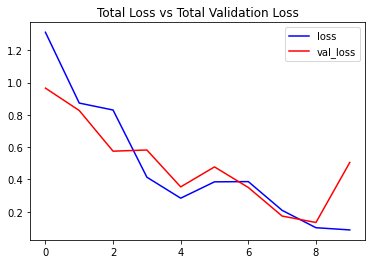

In [40]:
# Visualize the training and validation loss metrices.
plot_metric(LSTM_model, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

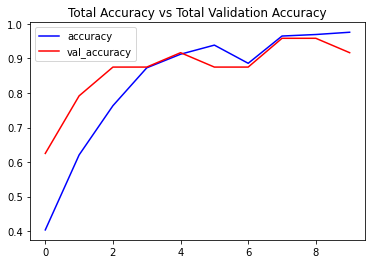

In [41]:
# Visualize the training and validation accuracy metrices.
plot_metric(LSTM_model, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy') 

In [42]:
x_test_predictions = np.argmax(model.predict(X_test), axis=1)

1/1 [==============================] - 0s 461ms/step


In [43]:
y_test_truevalue = np.argmax(y_test,axis=1)
y_test_truevalue

array([2, 1, 3, 0, 2, 0, 0, 0, 0, 2, 1, 3, 1, 1, 0, 0, 3, 3, 1, 3, 1, 3,
       1, 3], dtype=int64)

In [44]:
print(confusion_matrix(y_test_truevalue,x_test_predictions))

[[7 0 0 0]
 [0 7 0 0]
 [0 0 3 0]
 [0 2 0 5]]


In [45]:
print(classification_report(y_test_truevalue,x_test_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.78      1.00      0.88         7
           2       1.00      1.00      1.00         3
           3       1.00      0.71      0.83         7

    accuracy                           0.92        24
   macro avg       0.94      0.93      0.93        24
weighted avg       0.94      0.92      0.91        24



In [46]:
actions[np.argmax(res[4])]

'left'

In [47]:
actions[np.argmax(y_test[4])]

'up'

In [48]:
#model.save('final.h5')

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

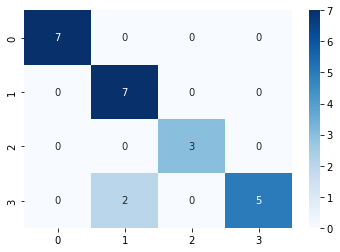

In [50]:
cm=confusion_matrix(y_test_truevalue,x_test_predictions)
sns.heatmap(cm,annot=True,cmap="Blues")

In [41]:
np.expand_dims(sequence, axis=0).shape

(1,)

In [18]:
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmark(image,results)

        keypoints = get_landmarks(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
"""
sequence=[]
sentence=[]
threshold=0.4

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence= 0.5) as holistic:

    while cap.isOpened():
        ret,frame = cap.read()

        image, results = detection(frame, holistic)

        draw_landmark(image,results)

        keypoints = get_landmarks(results)
        sequence.insert(0,keypoints)

        sentence=sequence[:60]

        if len(sequence)>=30:
            res=model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])        

        cv2.imshow('Live Feed', image)
        if cv2.waitKey(10) & 0xff == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows() 
"""

"\nsequence=[]\nsentence=[]\nthreshold=0.4\n\ncap = cv2.VideoCapture(0)\nwith mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence= 0.5) as holistic:\n\n    while cap.isOpened():\n        ret,frame = cap.read()\n\n        image, results = detection(frame, holistic)\n\n        draw_landmark(image,results)\n\n        keypoints = get_landmarks(results)\n        sequence.insert(0,keypoints)\n\n        sentence=sequence[:60]\n\n        if len(sequence)>=30:\n            res=model.predict(np.expand_dims(sequence, axis=0))[0]\n            print(actions[np.argmax(res)])        \n\n        cv2.imshow('Live Feed', image)\n        if cv2.waitKey(10) & 0xff == ord('q'):\n            break\n    cap.release()\n    cv2.destroyAllWindows() \n"

In [ ]:
cap.release()
cv2.destroyAllWindows() 

In [ ]:
cap = cv2.VideoCapture(0)
cap.set(10,200)

hd = HandDetector(detectionCon=0.9)

while True:
    _, img = cap.read()
    hand,imgs = hd.findHands(img,draw=False)
    if hand:
        lefthand = hand[0]
        bbox = lefthand["bbox"]
        lmlist = lefthand['lmList']
        handtype = lefthand['type']
        fingersup = hd.fingersUp(lefthand)
        totalfingers = fingersup.count(1)
        print(totalfingers)




    cv2.imshow('FRAME',img)
    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [43]:
import cv2
from cvzone.FaceDetectionModule import FaceDetector
from cvzone.HandTrackingModule import HandDetector
import os
import cvzone
#fps = cvzone.FPS()

cap = cv2.VideoCapture(0)
cap.set(10,200)

hd = HandDetector(detectionCon=0.7)


overlaylist=[]
folderpath = 'Fingers'
list = os.listdir(folderpath)
print(folderpath)
for imgpath in list:
    image = cv2.imread(f'{folderpath}/{imgpath}')
    overlaylist.append(image)



while True:
    _, img = cap.read()
    #fps.update(img,pos=(490,40),scale=2,color=(0,0,255))
    hand,imgs = hd.findHands(img)
    if hand:
        lefthand = hand[0]
        bbox = lefthand["bbox"]
        lmlist = lefthand['lmList']
        handtype = lefthand['type']
        fingersup = hd.fingersUp(lefthand)
        totalfingers = fingersup.count(1)
        h, w, c = overlaylist[totalfingers - 1].shape
        img[0:h, 0:w] = overlaylist[totalfingers - 1]
        #cv2.rectangle(img, (0, 200), (170, 425), (0, 0, 255), cv2.FILLED)
        cv2.putText(img, str(totalfingers), (45, 375), cv2.FONT_HERSHEY_PLAIN, 9, (255, 0, 0), 24)
        print(totalfingers)




    cv2.imshow('FRAME',img)
    key = cv2.waitKey(1)
    if key == 27:
        break
cap.release()
cv2.destroyAllWindows()

Fingers
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
1
1
1
0
0
1
1
1
0
0
1
1
1
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
5
3
0
0
0
0
0
0
0
0
0
0
2
2
2
2
1
1
2
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
1
1
0
0
1
2
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5
5
5
5
5
5
5
5
5
5
5
5
5
5
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
1
1
1
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
5
5


KeyboardInterrupt: 

In [44]:
cap.release()
cv2.destroyAllWindows() 